# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

 # Sklearn Imports

In [2]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay , f1_score ,classification_report
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

# Read CSV 

In [3]:
df=pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')
df_test=pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')

# Date Cleaning Function

In [4]:
def clean_date(date):
    i=0
    for x in date:
        # print(x)
        if x=='2days':
            date[i]=48
        else:
            date[i]=10
        i+=1
    return date

# Income Cleaning Function

In [5]:
def clean_income(data):    
    for i in range(len(data)):
        x=data[i]
        if x=='₹100000 or More':
            data[i]=100000
        elif x=='Less than ₹12500':
            data[i]=12500
        else:
            s=x.strip().split('-')
            a=float(s[0][1:])
            b=float(s[1][2:])
            data[i]=float((a+b)*0.5) # average calculation
    return data

# Age Cleaning Function

In [6]:
def clean_age(age):
    i=0
    for x in age:
        if x=="50plus":
            age[i]=52
        if x=="below21":
            age[i]=18
        i+=1
    return age

# Calling Cleaning Function

In [7]:
temp=df['offer expiration'].copy()
temp=clean_date(temp)
df['offer expiration']=temp
# temp
# For Test Data
temp=df_test['offer expiration'].copy()
temp=clean_date(temp)
df_test['offer expiration']=temp

In [8]:
temp=df['income_range'].copy()
temp=clean_income(temp)
df['income_range']=temp
# temp
# For Test Data
temp=df_test['income_range'].copy()
temp=clean_income(temp)
df_test['income_range']=temp

In [9]:
temp=df['age'].copy()
temp=clean_age(temp)
df['age']=temp
# temp
# For Test Data
temp=df_test['age'].copy()
temp=clean_age(temp)
df_test['age']=temp

# Cleaned DataSet

In [10]:
# df

In [11]:
# 2,4,11,13,19,21,25

In [12]:
target=[]
for x in df.columns:
    # print(type(x))
    # if(df.columns.get_loc(x) not in (2,4,11,13,19,21,25)):
    # dicarding extra cloumns for model     
    if(df.columns.get_loc(x) not in {2,4,11,13,19,21,25,9,10,3}):
        target.append(x)
# target

In [13]:
df[target].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   offer expiration                    12379 non-null  object
 1   income_range                        12379 non-null  object
 2   Marital Status                      12379 non-null  object
 3   restaurant type                     12379 non-null  object
 4   age                                 12379 non-null  object
 5   Prefer western over chinese         12379 non-null  int64 
 6   gender                              12379 non-null  object
 7   restuarant_same_direction_house     12379 non-null  int64 
 8   Cooks regularly                     12379 non-null  int64 
 9   Customer type                       12379 non-null  object
 10  Qualification                       12379 non-null  object
 11  is foodie                           12379 non-null  in

# Renaming Featues -

In [14]:
df=df[target]
# For Test Data
temp=target[:-1]
df_test=df_test[temp]

In [15]:
target[0]="offer_expiration(hrs)"
target[1]='income_range'
target[2]='shaadi'
target[3]='restaurant_type'
target[4]='age'
target[5]='western/chinese'
target[6]='gender'
target[7]='restuarant_same_direction_house'
target[8]='cooks_regularly'
target[9]='customer_type'
target[10]='education'
target[11]='is_foodie'
target[12]='industry'
target[13]='children'
target[14]='visit_restaurant_with_rating_(avg)'
target[15]='temperature'
target[16]='travel_time'
target[17]='climate'
target[18]='drop_location'
target[19]='prefer_home_food'
target[20]='offer_accepted'

In [16]:
df.columns=target
# For Test Data
temp=target[:-1]
df_test.columns=temp

# **Final Dataset After Cleaning**

In [17]:
# df

In [18]:
# df_test

Write and Read

In [19]:
df.to_csv('train1.csv',index=False)
df=None
df=pd.read_csv('./train1.csv')

# Split the DataSet into Train and Test

In [20]:
features=df.columns[:-1]
target=df.columns[-1]
X=df[features]
y=df[target]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, 
    test_size=0.20,
    random_state=42,
    shuffle=True
)

# PipeLine Declearation

In [22]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [23]:
categorical_transformer = Pipeline(
    steps=[(
    "encoder",OrdinalEncoder()
    )]
)
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numeric_transformer, numerical_columns),
        ("categorical", categorical_transformer, categorical_columns),
    ]
)
pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',RandomForestClassifier(
#         max_iter=10000,
        n_jobs=-1
    ))
])

***Label Transform***

In [24]:
lb=LabelEncoder()
lb.fit(y_train)
y_train=lb.transform(y_train)
y_test=lb.transform(y_test)

# Fitting the Pipeline

In [25]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['offer_expiration(hrs)',
                                                   'income_range', 'age',
                                                   'western/chinese',
                                                   'restuarant_same_direction_house',
                                                   'cooks_regularly',
                                                   'is_foodie', 'children',
                                                   'visit_restaurant_with_rating_(avg)',
                                                   'temperature', 'travel_time',
                                                   'prefer_home_food']),
                                              

# Looking at Training and Testing Errors

In [26]:
print('Emperical/Training Error',pipe.score(X_train,y_train))
print('Genrealisation/Test Error',pipe.score(X_test,y_test))

Emperical/Training Error 1.0
Genrealisation/Test Error 0.5852180936995154


# Genrating Submission

In [27]:
out=pipe.predict(df_test)
out=lb.inverse_transform(out)
out

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

<AxesSubplot:xlabel='Offer Accepted', ylabel='count'>

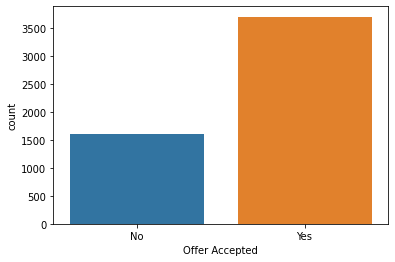

In [28]:
submission=pd.DataFrame(columns=['id','Offer Accepted'])
submission['id']=[i for i in range(len(df_test))]
submission['Offer Accepted']=out
sns.countplot(x=submission['Offer Accepted'])

**Writing to CSV**

In [29]:
submission.to_csv('submission.csv',index=False)